In [2]:
## imports

import sys
import os
import numpy as np
import xarray as xr
import pandas as pd
import cmocean as cmo
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap


# ENSO amplitude (Figure 2)

## Load data (ENSO amplitude change in percentage)

In [66]:
# LongRunMIP data from Callahan et al. 2022
# http://dx.doi.org/10.1038/s41558-021-01099-2
# Data taken from Figure 2

abrupt2x = np.array([-19, -29.1, -1.3, -9.8, -7.7, -5.6, 16.8])
abrupt4x = np.array([-42.6, -36.3, 1.2, -48.9, -54.4, -33.8, -22.8, -27.8, 26.9])
abrupt6x = np.array([-44.7])
abrupt8x = np.array([-58.6, -61.1, -46.8, 0.3])

# PlioMIP2 data from Oldeman et al 2021
# https://cp.copernicus.org/articles/17/2427/2021/
# Data from Figure 9b

pliomip2 = np.array([-43.7, -28.8, -66.5, -28.7, -1.6, -41.4, 2.5, -38.3, -20.33, 
                     -16.43, -21.04, -7.43, -25.6, 3, -38, -20.86])

# PMIP3/4 data from Brown et al. 2020
# 10.5194/cp-16-1777-2020
# Data from Figure 9

pmip_mh  = np.array([-5.6, -4.5, -3.7, -8.7, -8.7, 18.1, -17.7, -13.0, -2.1,
                    -24.7, -18.1, -2.9, -4.1, -6.0, -2.9, -10.7, -1.4, 1.4,
                    -17.3, -4.9, -36.7, -14.2, -12.2, -17.3, 10.7, -21.6, 
                    -9.5, -10.3, 16.1, -21.1])
pmip_lgm = np.array([-17, 2.8, 0.4, -47, -30.8, 16.6, 32.4, -13.4, 17.0, 4.3, -3.9, 18.2])
pmip_lig = np.array([-22.6, -20.3, -23.3, -19.9, -27.2, 0.2, -30.3, 10.2, -17.2, -53.8, -23.0, -20.6])


## Plot data in boxplots 

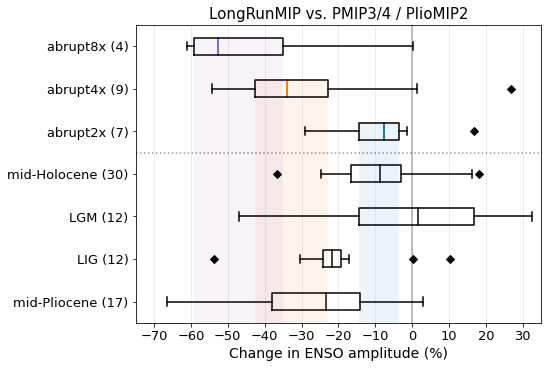

In [77]:
fig = plt.figure(figsize = (7.5,5), constrained_layout=True)
ax = fig.add_subplot(111)

# colors and linewidths of medians in boxplots
med_colors = ['k','k','k','k','tab:blue', 'tab:orange', 'tab:purple']
med_lws    = np.array([1.5, 1.5, 1.5, 1.5, 2., 2., 2.])

ax.plot([-75,35], [4.5,4.5], 'k:', alpha=0.4)
ax.set_xlim([-75,35])
ax.plot([0,0], [0.5,7.5], 'k-', alpha = 0.3)

# add colored patch following IQRs of LongRunMIP
ax.add_patch(Rectangle((np.percentile(abrupt2x,25), 0.5), np.percentile(abrupt2x,75)-np.percentile(abrupt2x,25), 5.22-0.5, 
                       facecolor = 'tab:blue', alpha = 0.08))
ax.add_patch(Rectangle((np.percentile(abrupt4x,25), 0.5), np.percentile(abrupt4x,75)-np.percentile(abrupt4x,25), 6.22-0.5, 
                       facecolor = 'tab:orange', alpha = 0.08))
ax.add_patch(Rectangle((np.percentile(abrupt8x,25), 0.5), np.percentile(abrupt8x,75)-np.percentile(abrupt8x,25), 7.22-0.5, 
                       facecolor = 'tab:purple', alpha = 0.08))
    
# plot boxplots of data
bp = ax.boxplot([pliomip2, pmip_lig, pmip_lgm, pmip_mh, abrupt2x, abrupt4x, abrupt8x], notch=False, vert=0, widths = 0.4,
               boxprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), whiskerprops=dict(linewidth=1.5),
               flierprops=dict(markerfacecolor='k', marker='D'));

# add colors and linewidths as defined before
for i_median in range(len(bp['medians'])):
    bp['medians'][i_median].set(color = med_colors[i_median], linewidth = med_lws[i_median], zorder=-1)

ax.set_yticklabels(['mid-Pliocene (17)', 'LIG (12)', 'LGM (12)', 'mid-Holocene (30)', 
                    'abrupt2x (7)', 'abrupt4x (9)', 'abrupt8x (4)'], fontsize = 13)

xticks = np.arange(-70,35,10)
ax.set_xticks(xticks)
plt.xticks(fontsize=13)
ax.set_xlabel('Change in ENSO amplitude (%)', fontsize = 14)

plt.title('LongRunMIP vs. PMIP3/4 / PlioMIP2', fontsize = 15)

ax.grid("on", alpha =0.3, axis='x')

plt.savefig('figures/analog/ENSO_change_paleo_longrun_v3.png', dpi = 200)


# Carbon emission rate (Figure 3)

## Load data

### Paleo: PETM (Gingerich 2019)

In [4]:
# PETM 
# from Gingerich 2019
# https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2018PA003379
# Data from Table 1

petm_years = np.array([5000, 19000, 3000, 5000, 4000, 20000, 3000]) #years
petm_accum = np.array([3000,  7126, 3000, 3000, 3500,  6141, 4500]) #Pg C
petm_rates = petm_accum / petm_years # Pg C / yr


### Paleo: Heinrich stadials (Wendt et al 2024)

In [5]:
# Heinrich stadials
# from Wendt et al 2024
# https://www.pnas.org/doi/10.1073/pnas.2319652121
# from Fig 2
# converted via excel table to PgC/yr

hs_years = np.array([100, 150, 200, 45, 55, 65, 100, 125, 150, 5, 15, 25, 55, 75, 95])
hs_rates = np.array([.19, .11, .07, .71, .54, .43, .11, .07, .04, 3.41, 1, .51, .5, .34, .25])

hs_mids = np.array([1,4,7,10,13])
hs_nrs = np.array([5,4,3,2,1])

### Historical: Global Carbon Project 

In [4]:
path = 'fossil_emissions_1750_2022.xlsx'
df = pd.read_excel(path, sheet_name='Sheet1', engine = 'openpyxl')
da = xr.DataArray(data = df["fossil emissions (PgC/yr)"].values, 
                  dims = ["year"],
                  coords = dict(year = (["year"], df["Year"].values)),
                  attrs = dict(description = "rate of fossil emissions", units = "PgC/year"))
                  
ds_hist = da.to_dataset(name = "rate").assign_attrs(source = "Global Carbon Budget 2023", 
                               link = "https://www.icos-cp.eu/science-and-impact/global-carbon-budget/2023")
emiss = da.cumsum().assign_attrs(description = "fossil emission cumulative sum", units = "PgC")
ds_hist["emiss"] = emiss

### Future: IPCC AR6 WGI Figure TS.18

In [5]:
path = 'SSP1-2.6 MMM fossil_emissions_1851-2100.xlsx'
df = pd.read_excel(path, sheet_name='Sheet1', engine = 'openpyxl')
da = xr.DataArray(data = df["fossil emissions (PgC/yr)"].values, 
                  dims = ["year"],
                  coords = dict(year = (["year"], df["Year"].values)),
                  attrs = dict(description = "SSP1 rate of fossil emissions", units = "PgC/year"))
                  
ds_ssp1 = da.to_dataset(name = "rate").assign_attrs(source = "IPCC AR6 WGI Figure TS.18", 
                               link = "https://github.com/IPCC-WG1/TS_Fig18/tree/main/CMIP6_DiagnosedEmissions_Liddicoat")
emiss = da.cumsum().assign_attrs(description = "fossil emission cumulative sum", units = "PgC")
ds_ssp1["emiss"] = emiss

path = 'SSP2-4.5 MMM fossil_emissions_1851-2100.xlsx'
df = pd.read_excel(path, sheet_name='Sheet1', engine = 'openpyxl')
da = xr.DataArray(data = df["fossil emissions (PgC/yr)"].values, 
                  dims = ["year"],
                  coords = dict(year = (["year"], df["Year"].values)),
                  attrs = dict(description = "SSP2 rate of fossil emissions", units = "PgC/year"))
                  
ds_ssp2 = da.to_dataset(name = "rate").assign_attrs(source = "IPCC AR6 WGI Figure TS.18", 
                               link = "https://github.com/IPCC-WG1/TS_Fig18/tree/main/CMIP6_DiagnosedEmissions_Liddicoat")
emiss = da.cumsum().assign_attrs(description = "fossil emission cumulative sum", units = "PgC")
ds_ssp2["emiss"] = emiss

path = 'SSP5-8.5 MMM fossil_emissions_1851-2100.xlsx'
df = pd.read_excel(path, sheet_name='Sheet1', engine = 'openpyxl')
da = xr.DataArray(data = df["fossil emissions (PgC/yr)"].values, 
                  dims = ["year"],
                  coords = dict(year = (["year"], df["Year"].values)),
                  attrs = dict(description = "SSP5 rate of fossil emissions", units = "PgC/year"))
                  
ds_ssp5 = da.to_dataset(name = "rate").assign_attrs(source = "IPCC AR6 WGI Figure TS.18", 
                               link = "https://github.com/IPCC-WG1/TS_Fig18/tree/main/CMIP6_DiagnosedEmissions_Liddicoat")
emiss = da.cumsum().assign_attrs(description = "fossil emission cumulative sum", units = "PgC")
ds_ssp5["emiss"] = emiss

## Compute rates

### Function to calculate rates

In [7]:
# calculate carbon emission rates

def compute_carbon_rates(ds):

    dyear = (ds.year-ds.year[0])[1:]
    rates = np.nan*np.ones([len(dyear), len(dyear)])

    for i_year in range(len(dyear)):
        d_year = dyear[i_year].values

        n=0
        while n<=len(dyear)-d_year:
            rates[i_year, n] = (ds.emiss.values[n+d_year] - ds.emiss.values[n])/d_year
            n=n+1

    return dyear, rates

In [9]:
# calculate carbon emission rates and also include end-year as output

def compute_carbon_rates_year(ds):

    dyear = (ds.year-ds.year[0])[1:]
    rates = np.nan*np.ones([len(dyear), len(dyear)])
    year  = np.nan*np.ones([len(dyear), len(dyear)])

    for i_year in range(len(dyear)):
        d_year = dyear[i_year].values

        n=0
        while n<=len(dyear)-d_year:
            rates[i_year, n] = (ds.emiss.values[n+d_year] - ds.emiss.values[n])/d_year
            year[i_year, n]  = ds.year.values[n+d_year]
            n=n+1

    return dyear, rates, year

### Calculate the rates

In [10]:
dyear_hist, rates_hist = compute_carbon_rates(ds_hist.sel(year=slice(1851,2022)))
dyear_hist2, rates_hist2 = compute_carbon_rates(ds_hist.sel(year=slice(1959,2022)))

dyear_ssp1, rates_ssp1 = compute_carbon_rates(ds_ssp1)
dyear_ssp2, rates_ssp2 = compute_carbon_rates(ds_ssp2)
dyear_ssp5, rates_ssp5 = compute_carbon_rates(ds_ssp5)

dyear_hist_alt, rates_hist_alt, year_hist_alt = compute_carbon_rates_year(ds_hist.sel(year=slice(1851,2022)))


### Compute the extrapolated rates; constant emission and increasing interval

In [11]:
ds = ds_hist.sel(year=slice(1851,2022))

int_hist_ext = np.array([ds.year[-1] - ds.year[0], 3e4])
rates_hist_ext = (ds.emiss.values[-1] - ds.emiss.values[0]) / int_hist_ext[0]
rates_hist_ext = np.array([rates_hist_ext, (ds.emiss.values[-1] - ds.emiss.values[0]) / int_hist_ext[1]])

ds = ds_ssp5

int_ssp5_ext = np.array([ds.year[-1] - ds.year[0], 3e4])
rates_ssp5_ext = (ds.emiss.values[-1] - ds.emiss.values[0]) / int_ssp5_ext[0]
rates_ssp5_ext = np.array([rates_ssp5_ext, (ds.emiss.values[-1] - ds.emiss.values[0]) / int_ssp5_ext[1]])


## Plot figure

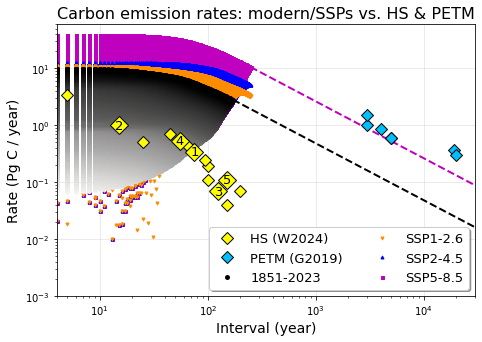

In [32]:
fig = plt.figure(figsize = (7.5,5))

# plot SSPs
p4=plt.plot(dyear_ssp5, rates_ssp5, 's', color='m', markersize=3)
p5=plt.plot(dyear_ssp2, rates_ssp2, '^', color='b', markersize=3)
p6=plt.plot(dyear_ssp1, rates_ssp1, 'v', color='darkorange', markersize=3)

# plot extended rates
plt.plot(int_hist_ext, rates_hist_ext, 'k--', linewidth = 2)
plt.plot(int_ssp5_ext, rates_ssp5_ext, 'm--', linewidth = 2)

# plot historical data with grayscale per end-year
cmap = plt.get_cmap('cmo.gray')
for i in range(1852, 2022):
    color = cmap((2022 - i)/(2022-1852))  # Calculate grayscale color for each column of y-data
    p1=plt.plot(dyear_hist, rates_hist_alt * np.where(year_hist_alt == i, True, np.nan), 
             'o', markersize=5, markeredgewidth = 0.001, markeredgecolor = None, markerfacecolor=color)

# plot PETM and HS
p3 = plt.plot(petm_years, petm_rates,'D',markersize=9, markerfacecolor = 'deepskyblue', markeredgecolor='k')
p7 = plt.plot(hs_years, hs_rates, 'D',markersize=9, markerfacecolor = 'yellow', markeredgecolor='k')

# include HS number on marker
plt.plot(hs_years[hs_mids], hs_rates[hs_mids], 'D',markersize=13, markerfacecolor = 'yellow', markeredgecolor='k')
for i in range(len(hs_mids)):
    plt.text(hs_years[hs_mids[i]], hs_rates[hs_mids[i]], hs_nrs[i], fontsize = 13,horizontalalignment='center',
     verticalalignment='center')

plt.axis([4e0, 3e4, 1e-3, 6e1])
plt.yscale("log"); 
plt.xscale("log")

plt.xlabel("Interval (year)", fontsize = 14)
plt.ylabel("Rate (Pg C / year)", fontsize = 14)

plt.legend([p7[0], p3[0],p1[0], p6[0],p5[0],p4[0]], 
           ['HS (W2024)', 'PETM (G2019)', '1851-2023', 'SSP1-2.6', 'SSP2-4.5', 'SSP5-8.5'], 
           loc='lower right', fontsize = 13, shadow=True, ncol=2);

plt.grid("on", alpha = 0.3)

plt.title("Carbon emission rates: modern/SSPs vs. HS & PETM", fontsize = 16)

plt.savefig('figures/analog/modern_past_emission_rates_v4.png', dpi = 150)

# Warming rate (Figure 4)

## Load data

### Proxies from Kemp et al 2015

In [33]:
# paleo warming events
# from Kemp et al. 2015
# https://www.nature.com/articles/ncomms9890
# Data presented in Figure 1,
# Data taken from Supplementary 

# selection:
# rate > 10^-3 degC/year
# timespan < 1000 years

warming_years = np.array([100,  200,   200,    200,    270, 500, 500, 500, 530, 600, 800, 800, 800]) #years
warming_rates = np.array([0.03, 0.022, 0.0125, 0.0185, 0.01, 0.004, 0.012, 0.005, 0.0094, 0.00667, 0.00375, 0.00438, 0.00563]) #degC/yr


### historical data from GISSTEMP

In [34]:
path = 'gmst.xlsx'
df = pd.read_excel(path, sheet_name='graph', engine = 'openpyxl')
da = xr.DataArray(data = df["GMST anomaly (deg C)"].values, 
                  dims = ["year"],
                  coords = dict(year = (["year"], df["Year"].values)),
                  attrs = dict(description = "GMST anomaly from 1951-1980 average", units = "deg C"))
                  
ds_hist = da.to_dataset(name = "gmsta").assign_attrs(source = "NASA/GISS", 
                               link = "https://climate.nasa.gov/vital-signs/global-temperature/?intent=121")


### Future data from IPCC AR6 Interactive atlas

In [49]:
path = 'SSP1-2.6 MMM warming 1850-2100.xlsx'
df = pd.read_excel(path, sheet_name='Sheet1', engine = 'openpyxl')
da = xr.DataArray(data = np.round(df["MMM warming rel to 1850-1900 (deg C)"].values,3), 
                  dims = ["year"],
                  coords = dict(year = (["year"], df["Year"].values)),
                  attrs = dict(description = "SSP1-2.6 CMIP6 MMM GMST anomaly from 1951-1980 average", units = "deg C"))
                  
ds_ssp1 = da.to_dataset(name = "gmsta").assign_attrs(source = "CMIP6 SSP1-2.6 MMM Copernicus atlas", 
                               link = "https://atlas.climate.copernicus.eu/atlas")

path = 'SSP2-4.5 MMM warming 1850-2100.xlsx'
df = pd.read_excel(path, sheet_name='Sheet1', engine = 'openpyxl')
da = xr.DataArray(data = np.round(df["MMM warming rel to 1850-1900 (deg C)"].values,3), 
                  dims = ["year"],
                  coords = dict(year = (["year"], df["Year"].values)),
                  attrs = dict(description = "SSP2-4.5 CMIP6 MMM GMST anomaly from 1951-1980 average", units = "deg C"))
                  
ds_ssp2 = da.to_dataset(name = "gmsta").assign_attrs(source = "CMIP6 SSP2-4.5 MMM Copernicus atlas", 
                               link = "https://atlas.climate.copernicus.eu/atlas")

path = 'SSP5-8.5 MMM warming 1850-2100.xlsx'
df = pd.read_excel(path, sheet_name='Sheet1', engine = 'openpyxl')
da = xr.DataArray(data = np.round(df["MMM warming rel to 1850-1900 (deg C)"].values,3), 
                  dims = ["year"],
                  coords = dict(year = (["year"], df["Year"].values)),
                  attrs = dict(description = "SSP5-8.5 CMIP6 MMM GMST anomaly from 1951-1980 average", units = "deg C"))
                  
ds_ssp5 = da.to_dataset(name = "gmsta").assign_attrs(source = "CMIP6 SSP5-8.5 MMM Copernicus atlas", 
                               link = "https://atlas.climate.copernicus.eu/atlas")


## Computations

### Define function to compute rates

In [50]:
def compute_rates(ds):

    dyear = (ds.year-ds.year[0])[1:]
    rates = np.nan*np.ones([len(dyear), len(dyear)])
    year  = np.nan*np.ones([len(dyear), len(dyear)])

    for i_year in range(len(dyear)):
        d_year = dyear[i_year].values

        n=0
        while n<=len(dyear)-d_year:
            rates[i_year, n] = (ds.gmsta.values[n+d_year] - ds.gmsta.values[n])/d_year
            year[i_year, n]  = ds.year.values[n+d_year]
            n=n+1

    return dyear, rates, year

### Compute rates

In [51]:
dyear_hist, rates_hist, year_hist = compute_rates(ds_hist)
dyear_ssp1, rates_ssp1, _ = compute_rates(ds_ssp1.sel(year=slice(1880,2100)))
dyear_ssp2, rates_ssp2, _ = compute_rates(ds_ssp2.sel(year=slice(1880,2100)))
dyear_ssp5, rates_ssp5, _ = compute_rates(ds_ssp5.sel(year=slice(1880,2100)))

### Extrapolate rates with constant warming and increasing intervals

In [52]:
ds = ds_hist.sel(year=slice(1880,2023))

int_hist_ext = np.array([ds.year[-1] - ds.year[0], 1e3])
rates_hist_ext = (ds.gmsta.values[-1] - ds.gmsta.values[0]) / int_hist_ext[0]
rates_hist_ext = np.array([rates_hist_ext, (ds.gmsta.values[-1] - ds.gmsta.values[0]) / int_hist_ext[1]])

ds = ds_ssp5

int_ssp5_ext = np.array([ds.year[-1] - ds.year[0], 1e3])
rates_ssp5_ext = (ds.gmsta.values[-1] - ds.gmsta.values[0]) / int_ssp5_ext[0]
rates_ssp5_ext = np.array([rates_ssp5_ext, (ds.gmsta.values[-1] - ds.gmsta.values[0]) / int_ssp5_ext[1]])


## Plot Figure

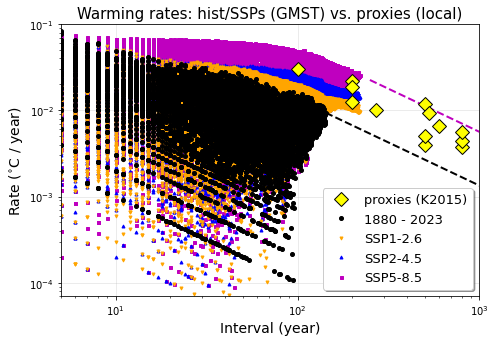

In [58]:
fig = plt.figure(figsize = (7.5,5))

# plot SSPs
p4=plt.plot(dyear_ssp5, rates_ssp5, 's', color='m', markersize=3)
p3=plt.plot(dyear_ssp2, rates_ssp2, '^', color='b', markersize=3)
p2=plt.plot(dyear_ssp1, rates_ssp1, 'v', color='orange', markersize=3)

# plot historical
p1 = plt.plot(dyear_hist, rates_hist,'ko',markersize=4)

# plot extended rates
plt.plot(int_hist_ext, rates_hist_ext, 'k--', linewidth = 2)
plt.plot(int_ssp5_ext, rates_ssp5_ext, 'm--', linewidth = 2)

# plot proxies
p5 = plt.plot(warming_years, warming_rates, 'D',markersize=10, markerfacecolor = 'yellow', markeredgecolor='k')

plt.axis([5e0, 1e3, 7e-5, 1e-1])

plt.yscale("log"); 
plt.xscale("log")
plt.xlabel("Interval (year)", fontsize = 14)
plt.ylabel(r"Rate ($^{\circ}$C / year)", fontsize = 14)

plt.legend([p5[0], p1[0],p2[0],p3[0],p4[0]], 
           ['proxies (K2015)','1880 - 2023', 'SSP1-2.6', 'SSP2-4.5','SSP5-8.5'], 
           loc='lower right', fontsize = 13, ncol=1, shadow=True);

plt.grid("on",alpha=0.3)

plt.title("Warming rates: hist/SSPs (GMST) vs. proxies (local)", fontsize = 15)

plt.savefig('figures/analog/modern_ssps_proxies_warming_rates_v6.png', dpi = 150)